In [1]:
import numpy as np

In [2]:
np.random.seed(42)
X = np.random.rand(100, 1)
true_w, true_b = 2.0, 3.0 


y = true_w * X + true_b + 0.1 * np.random.randn(100, 1)



def compute_loss(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

def compute_gradients(X, y, w, b):
    n = X.shape[0]
    y_pred = X @ w + b
    error = y_pred - y
    dw = (2/n) * X.T @ error
    db = (2/n) * np.sum(error)
    
    return dw, db

def full_batch_gd(X, y, lr=0.1, epochs=100):
    w = np.zeros((1,1))
    b = 0.0
    for epoch in range(epochs):
        dw, db = compute_gradients(X, y, w, b)
        w -= lr * dw
        b -= lr * db
    return w, b

def stochastic_gd(X, y, lr=0.01, epochs=100):
    w = np.zeros((1, 1))
    b = 0.0
    n = X.shape[0]
    for epoch in range(epochs):
        for i in range(n):
            xi = X[i:i+1]
            yi = y[i:i+1]
            dw, db = compute_gradients(xi, yi, w, b)
            w -= lr * dw
            b -= lr * db
    return w, b

def mini_batch(X, y, lr=0.05, epochs=100, batch_size=16):
    w = np.zeros((1, 1))
    b = 0.0
    
    n = X.shape[0]
    
    
    for epoch in range(epochs):
        indices = np.random.permutation(n)
        X_shuffled = X[indices]
        y_shuffled = y[indices]
        
        for i in range(0, n, batch_size):
            X_batch = X_shuffled[i:i+batch_size]
            y_batch = y_shuffled[i:i+batch_size]
            
            dw, db = compute_gradients(X_batch, y_batch, w, b)
            w -= lr * dw
            b -= lr * db
            
    return w, b

In [3]:
w1, b1 = full_batch_gd(X, y)
w2, b2 = stochastic_gd(X, y)
w3, b3 = mini_batch(X, y)


print(f"Full-Batch GD: w = {w1[0][0]:.4f}, b = {b1:.4f}")
print(f"Stochastic GD: w = {w2[0][0]:.4f}, b = {b2:.4f}")
print(f"Mini-Batch GD: w = {w3[0][0]:.4f}, b = {b3:.4f}")

Full-Batch GD: w = 1.8727, b = 3.0627
Stochastic GD: w = 1.9573, b = 3.0270
Mini-Batch GD: w = 1.9471, b = 3.0204


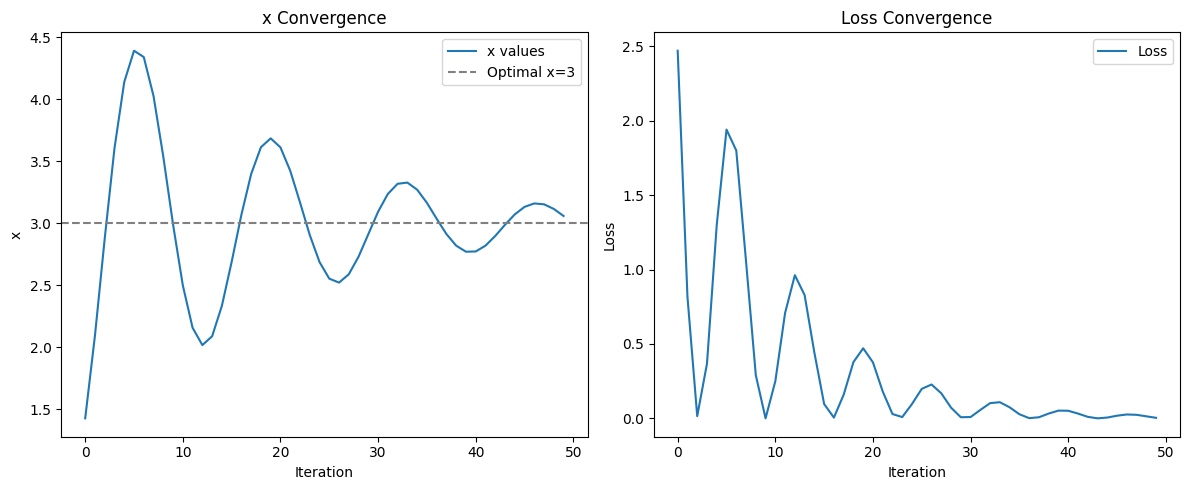

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Define loss and gradient
def loss(x):
    return (x - 3)**2

def grad(x):
    return 2 * (x - 3)

# Momentum Gradient Descent with tracking
def momentum_gd(lr=0.1, momentum=0.9, steps=50):
    x = np.random.randn()
    v = 0
    xs, losses = [], []

    for _ in range(steps):
        g = grad(x)
        v = momentum * v - lr * g
        x += v
        xs.append(x)
        losses.append(loss(x))

    return xs, losses

# Run optimizer and plot
xs, losses = momentum_gd()

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(xs, label='x values')
plt.axhline(3, color='gray', linestyle='--', label='Optimal x=3')
plt.title("x Convergence")
plt.xlabel("Iteration")
plt.ylabel("x")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(losses, label='Loss')
plt.title("Loss Convergence")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

In [11]:
def func(x):
    return x ** 2

def grad(x):
    return 2*x 

eta = 0.01 #learning rate
gamma = 0.9 #decay rate
epsilon = 1e-8 

x = 10.0

s = 0

for t in range(1, 101):
    g = grad(x)
    s = gamma * s + (1 - gamma) * g**2
    x = x - (eta / np.sqrt(s) + epsilon) * g
    
print(x)

8.917297791674299
